In [1]:
# Import essential libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: For clean visuals
sns.set(style='whitegrid')


In [2]:
# Load the Iris dataset
iris = load_iris()

# Convert to a DataFrame for easy handling
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add target and species name
df['target'] = iris.target
df['species'] = df['target'].apply(lambda x: iris.target_names[x])

# Preview the dataset
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [3]:
# Check for missing values
df.isnull().sum()

# Get basic stats
df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [5]:
# Features and labels
X = df[iris.feature_names]     # Input features
y = df['target']               # Labels (0, 1, 2)

# Split into training and test data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [6]:
# Create and train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report


In [8]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision and Recall (for multi-class use average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Classification Report
report = classification_report(y_test, y_pred, target_names=iris.target_names)

# Show results
print("✅ Model Evaluation Results:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("\n📋 Classification Report:\n", report)


✅ Model Evaluation Results:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00

📋 Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [9]:
# Get feature importance scores
feature_names = iris.feature_names
importances = model.feature_importances_


/tmp/ipykernel_699/2251493919.py:10: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


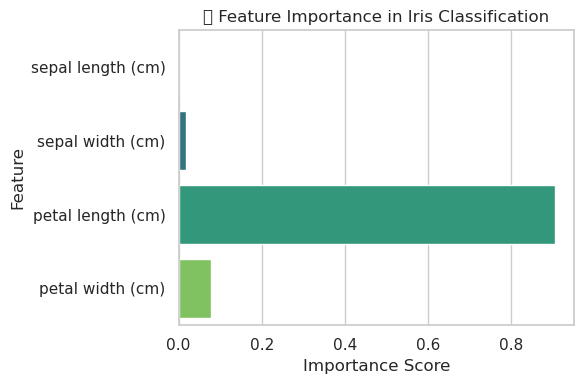

In [10]:
# Plot feature importances
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.barplot(x=importances, y=feature_names, palette='viridis')
plt.title("🔍 Feature Importance in Iris Classification")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [11]:
import joblib


In [12]:
# Save the trained model to a file
joblib.dump(model, 'iris_model.pkl')

print("✅ Model saved as 'iris_model.pkl'")


✅ Model saved as 'iris_model.pkl'
